In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def fx(x): 
    return 1/x

def dfx(x):
    return 2*x-2

def ddfx(x): 
    return 2

# EIGEN VALUE DAN EIGEN VECTOR

1. Metode Power

In [2]:

def power_method(A):
    n = A.shape[0]  
    x = np.array([[1.0], [3.0],[4.0]])
    prevd = 0
    iteration = 0; 
    while(True): 
        temp = A @ x
        d = np.sqrt(np.sum(temp**2))
        x = temp/d
        
        if(abs(prevd-d)<0.0001): break

        print("Iterasi ke-", iteration+1)
        print("x: ", x)
        print("xi: ", temp)
        print("d: ", d)
        
        prevd = d
        prevx = x
        iteration = iteration + 1
    
    return d, x, iteration

A = np.array([[20,-4,8],[-40,8,-20],[-40, 12, -26]]) 

eigenvalue, eigenvector, iteration = power_method(A)
print("Iteration, N: ", iteration)
print("Dominant eigenvalue:", eigenvalue)
print("Dominant eigenvector:\n", eigenvector)


Iterasi ke- 1
x:  [[ 0.26678526]
 [-0.64028463]
 [-0.72032021]]
xi:  [[  40.]
 [ -96.]
 [-108.]]
d:  149.9333185119305
Iterasi ke- 2
x:  [[ 0.82956136]
 [-0.53921488]
 [ 0.14517324]]
xi:  [[ 2.13428211]
 [-1.38728337]
 [ 0.37349937]]
d:  2.5727839166650845
Iterasi ke- 3
x:  [[ 0.31821697]
 [-0.64571527]
 [-0.69411076]]
xi:  [[ 19.90947254]
 [-40.39963803]
 [-43.42753698]]
d:  62.565715988904856
Iterasi ke- 4
x:  [[ 0.58622285]
 [-0.69293372]
 [-0.41974472]]
xi:  [[ 3.39431434]
 [-4.01218562]
 [-2.4303821 ]]
d:  5.790143392794601
Iterasi ke- 5
x:  [[ 0.35524169]
 [-0.65693421]
 [-0.66501187]]
xi:  [[ 11.13823408]
 [-20.5974893 ]
 [-20.85075589]]
d:  31.35396059441269
Iterasi ke- 6
x:  [[ 0.49167117]
 [-0.68693988]
 [-0.53513836]]
xi:  [[ 4.41247578]
 [-6.16490409]
 [-4.80256972]]
d:  8.974444883795986
Iterasi ke- 7
x:  [[ 0.38128578]
 [-0.66423962]
 [-0.64296725]]
xi:  [[  8.30007596]
 [-14.45959847]
 [-13.99652783]]
d:  21.76864810099735
Iterasi ke- 8
x:  [[ 0.45403016]
 [-0.68083311]


2. Dekomposisi QR

In [16]:
import numpy as np

def qr_decomposition(A):
    m, n = A.shape
    Q = np.eye(m)  # Inisialisasi matriks identitas untuk matriks Q
    R = A.copy()   # Copy matriks A ke matriks R
    
    for j in range(n):
        # Proses pengukuran untuk setiap kolom pada matriks R
        for i in range(j):
            # Menghitung proyeksi matriks R ke matriks Q untuk membuat R menjadi upper triangular
            R[:, j] -= np.dot(Q[:, i], R[:, j]) * Q[:, i]
        # Normalisasi kolom matriks R untuk mendapatkan vektor Q
        Q[:, j] = R[:, j] / np.linalg.norm(R[:, j])
        
    return Q, R

def qr_algorithm(A, max_iterations=1000, tol=1e-6):
    m, n = A.shape
    eigenvalues = np.zeros(m, dtype=np.complex)
    eigenvectors = np.zeros((m, m), dtype=np.complex)
    
    for i in range(max_iterations):
        Q, R = qr_decomposition(A)
        A = np.dot(R, Q)   # Update matriks A dengan R dan Q
        
        # Cek konvergensi
        if np.linalg.norm(np.triu(A, k=1)) < tol:
            break
    
    # Ambil eigenvalues dari diagonal matriks A
    eigenvalues = np.diag(A)
    
    # Menghitung eigenvectors menggunakan matriks Q yang telah diperoleh
    for i in range(m):
        eigenvectors[:, i] = np.linalg.solve(A - eigenvalues[i] * np.eye(m), np.dot(Q, np.eye(m)[:, i]))
    
    return eigenvalues, eigenvectors

# Contoh penggunaan
if __name__ == "__main__":
    # Ganti matriks berikut dengan matriks yang ingin dihitung eigenvalue dan eigenvector-nya
    A = np.array([
        [2, 1, 2],
        [1, 3, 4],
        [2, 2, 1]
    ])
    
    eigenvalues, eigenvectors = qr_algorithm(A)
    
    print("Eigenvalues:")
    print(eigenvalues)
    
    print("\nEigenvectors:")
    print(eigenvectors)


C:\Users\RAYHAN EGAR\AppData\Local\Temp\ipykernel_17764\1557304801.py:20: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eigenvalues = np.zeros(m, dtype=np.complex)
C:\Users\RAYHAN EGAR\AppData\Local\Temp\ipykernel_17764\1557304801.py:21: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eigenvectors = np.zeros((m, m), dtype=

UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

3. Singular Value

# Optimasi

1. Metode GSS

In [4]:
def GSS():
    #Pilih 2 nilai x1 dan x2 sehingga x1 < x2
    xl = float(input("Masukkan nilai xl: "))
    xu = float(input("Masukkan nilai xu: "))

    d = 0.61803*(xu-xl)
    x1 = xl + d
    x2 = xu - d

    id = 1
    print("Iterasi","\t","x1","\t","x2","\t","f(x1)","\t","f(x2)")
    while(fx(x1)*fx(x2)!=0):
        if(fx(x1)<fx(x2)):
            xl = x2
        elif(fx(x2)<fx(x1)):
            xu = x1
        d = 0.61803*(xu-xl)
        x1 = xl + d
        x2 = xu - d
        id = id+1
        print(id,"\t",x1,"\t",x2,"\t",fx(x1),"\t", fx(x2))

    print("Solusi: ")
    print("X1: ", x1)
    print("X2: ", x2)


2. Metode Newton

In [5]:
def metnewton():
    x = float(input("Masukkan nilai x awal: "))
    id = 1; 
    print("k","\t\t","x","\t\t","f(x)","\t\t","f'(x)","\t\t","f''(x)")
    while(abs(dfx(x))>0):
        x = x-dfx(x)/ddfx(x)
        print(id,"\t\t",round(x,3),"\t\t",round(fx(x),3),"\t\t",round(dfx(x),3),"\t\t",round(ddfx(x),3))
    print("Solusi: ", x)

# Interpolasi

In [6]:
tabel = np.array([[1,2,3,4,5,6,7],[0.5,2.5,2.0,4.0,3.5,6.0,5.5]])

1. Linear Regresion

In [7]:
def linear_reg(tabel):
    n = tabel.shape[1]
    x = np.sum(tabel[0])
    y = np.sum(tabel[1])
    xsquare = np.sum(tabel[0]*tabel[0])
    print(xsquare)
    xbar = x/7.0
    ybar = y/7.0

    xy = np.sum(tabel[0]*tabel[1])

    a1 = float((n*xy-x*y)/(n*xsquare - (x)**2))
    a0 = ybar - a1*xbar

    fx = lambda: a0 + a1*x
    print(fx)
    # y = a0 + a1x

2. Polynomial Regression

28.0
A: [-0.28571429  1.07738095 -0.0297619 ]
A1:  -0.28571428571424917
A2:  1.0773809523809348
A3:  -0.029761904761903324
Persamaan regresi: y = -0.286 + 1.077x + -0.030x^2


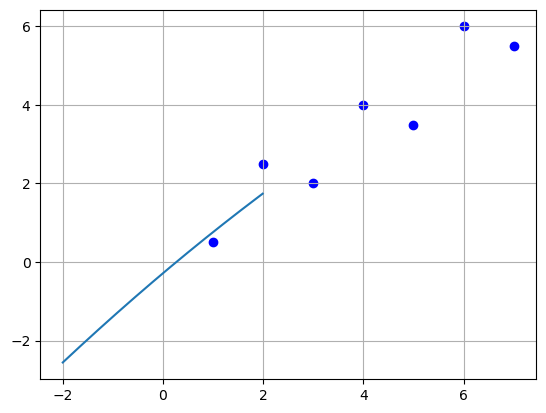

Persamaan Regresi fx(2):  1.750000000000007
Nilai sebnarnya/ Nilai pada tabel:  5.0
3.249999999999993


In [8]:
def polynomial_reg(tabel): 
    n = len(tabel[0])
    x1 = np.sum(tabel[0])
    x2 = np.sum([i**2 for i in tabel[0]])
    x3 = np.sum([i**3 for i in tabel[0]])
    x4 = np.sum([i**4 for i in tabel[0]])
    y1 = np.sum(tabel[1])
    xy = np.sum([tabel[1][i] * tabel[0][i] for i in range(len(tabel[1]))])
    x2y = np.sum([(tabel[0][i]**2) * tabel[1][i] for i in range(len(tabel[0]))])

    X = np.array([[n, x1, x2], [x1, x2, x3], [x2, x3, x4]])
    B = np.array([y1, xy, x2y])

    X_inverse = np.linalg.inv(X)

    print(x1)

    A = X_inverse @ B

    print("A:", A)
    print("A1: ", A[0])
    print("A2: ", A[1])
    print("A3: ", A[2])

    print(f"Persamaan regresi: y = {A[0]:.3f} + {A[1]:.3f}x + {A[2]:.3f}x^2")

    x = np.arange(-2,2,0.01)
    fx = lambda x : A[0] + A[1] * x + A[2] * (x ** 2)
    plt.scatter(tabel[0], tabel[1], color='blue', label='Data')
    plt.plot(x,fx(x),'-')
    plt.grid(True)
    plt.show()

    print("Persamaan Regresi fx(2): ", fx(2))
    print("Nilai sebnarnya/ Nilai pada tabel: ", tabel[0][4])
    E2 = tabel[0][4] - fx(2)
    print(E2)

polynomial_reg(tabel)


# Differential

1. Metode Taylor

In [9]:
def forward_difference(x, h):
    return (fx(x+h)-f(x))/float(h)

def backward_difference(x, h): 
    return(x - fx(x-h))/float(h)

def central_difference(x, h):
    return (fx(x+h) - fx(x-h))/float(2*h)


2. Metode Rieman

In [10]:
def extrapolasi_richardson(x,h):
  return (8*fx(x+h)-8*fx(x-h)-(fx(x+2*h)-fx(x-2*h)))/float(12*h)

# Integral

1. Metode Rieman (Kiri, Kanan, Tengah)

In [11]:
def h(a,b,n):
  return (b-a)/n

def rieman_kiri(a, b, n):
  ha = h(a, b, n)
  x = np.arange(a, b + ha, ha)
  sum = 0
  for i in range (0,n):
    sum += fx(x[i])
  return ha*sum

def rieman_kanan(a, b, n):
  ha = h(a, b, n)
  x = np.arange(a, b + ha, ha)
  sum = 0
  for i in range (1,n+1):
    sum += fx(x[i])
  return ha*sum

def rieman_tengah(a, b, n):
  ha = h(a, b, n)
  x = np.arange(a, b + ha, ha)
  sum = 0
  for i in range (0,n):
    sum += (fx(x[i])+fx(x[i+1]))/2
  return ha*sum

rieman_tengah(1, 2, 4)


0.6970238095238095

2. Metode Trapesium

In [12]:
def met_trapesium(a, b, n):
    ha = h(a, b, n)
    x = np.arange(a, b + ha, ha)


    sum = fx(x[0])
    for i in range(1, n):
        sum += 2 * fx(x[i])
    sum += fx(x[n])
    
    return ha / 2 * sum

met_trapesium(1, 2, 4)

0.6970238095238095

3. Metode Simpson (Parabola)

In [13]:
def met_simpson(a, b, n):
    if(n%2!=0):
        return
    else: 
        ha= h(a, b, n)

        awal = a 
        akhir = b
        tengah = (awal+akhir)/2
        seperempatAw = (awal+tengah)/2 
        seperempatAk = (tengah+akhir)/2

        return ha*(fx(awal)+fx(akhir)+4*(fx(seperempatAw)+fx(seperempatAk))+2*fx(tengah))/3.0

met_simpson(1, 5, 4)

1.6222222222222225

4. Menentukan Error Approximation